# Latar Belakang

UCI Machine Learning Repository adalah kumpulan data  membantu memperkirakan tingkat obesitas berdasarkan kebiasaan makan, riwayat keluarga, dan kondisi fisik. Kumpulan data ini mencakup data dari individu di Meksiko, Peru, dan Kolombia, yang mencakup 16 fitur terkait gaya hidup dan kesehatan dengan 2111 catatan. Label tersebut mengklasifikasikan tingkat obesitas, mulai dari berat badan kurang hingga berbagai jenis obesitas.
Dengan menganalisis dataset ini, kita dapat mencari hubungan antara variabel-variabel tersebut dan risiko seseorang terkena obesitas, sehingga dapat mengetahui lebih awal dan dapat mengantisipasinya dengan memperbaiki pola hidup.

Beberapa variabel yang umumnya terdapat dalam dataset ini dan dapat dianalisis antara lain:
1. Gender : Pria atau Wanita.
2. Age : Usia orang tersebut dalam tahun.
3. Height : Tinggi dalam meter.
4. Weight : Berat dalam kilogram.
5. family_history_with_overweight : Apakah orang tersebut memiliki riwayat keluarga yang kelebihan berat badan.
6. FAVC : Apakah orang tersebut sering mengonsumsi makanan berkalori tinggi.
7. FCVC : Frekuensi konsumsi sayur.
8. NCP : Jumlah makanan utama per hari.
9. CAEC : Frekuensi mengonsumsi makanan di antara waktu makan (Cemilan).
10. SMOKE :  Apakah orang tersebut merokok.
11. CH2O :  Asupan air harian.
12. SCC : Apakah orang tersebut memantau asupan kalorinya.
13. FAF : Frekuensi aktivitas fisik. 
14. TUE : Waktu yang dihabiskan menggunakan teknologi.
15. CALC : Frekuensi konsumsi alkohol.
16. MTRANS : Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Berjalan Kaki).
17. NObeyesdad : Tingkat obesitas (Berat Badan Tidak Cukup, Berat Badan Normal, Berat Badan Berlebih Level I, Berat Badan Berlebih Level II, Obesitas Tipe I, Obesitas Tipe II, Obesitas Tipe III).

Variabel-variabel ini dapat dianalisis untuk mencari hubungan, pola, atau faktor risiko yang terkait dengan tingkat obesitas. 


# Import Library

In [91]:
# import library preprocessing dan visualisasi
import numpy as np # untuk perhitungan statistik
from numpy import mean # mencari nilai mean
import pandas as pd #membaca, pembersihan, analisis data 
import matplotlib.pyplot as plt # visualisasi data
%matplotlib inline
import seaborn as sns # membuat grafik dan statistik
from sklearn.preprocessing import LabelEncoder, StandardScaler #pemrosesan data
from sklearn import preprocessing # pemrosesan data
from sklearn.model_selection import train_test_split # membagi data menjadi dua, yaitu data testing dan training 

# Import library modelling
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn import metrics

import streamlit as st # install streamlit


import warnings
warnings.filterwarnings("ignore")

print('Import Library Berhasil')

Import Library Berhasil


# Loading Data Set

In [6]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


# Melihat ukuran data (baris, kolom)

In [8]:
#checing total row,columns
df.shape

(2111, 17)

# Pengecekan Nama Kolom

In [10]:
#checking values/name of columns
df.columns.values #checking values/name of columns

array(['Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'], dtype=object)

# Deskriptif Statistik

In [12]:
#showing statistic of dataset
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Tipe Data

In [14]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Pengecekan Missing Value

In [16]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Dalam data tidak terdapat data kosong atau missing value

# Pre Processing Data

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
df_baru = df.copy()

In [21]:
df_baru["family_history_with_overweight"]=encoder.fit_transform(df_baru["family_history_with_overweight"])
df_baru["Gender"]=encoder.fit_transform(df_baru["Gender"]) 
df_baru["FAVC"]=encoder.fit_transform(df_baru["FAVC"])
df_baru["CAEC"]=encoder.fit_transform(df_baru["CAEC"])
df_baru["SMOKE"]=encoder.fit_transform(df_baru["SMOKE"])
df_baru["CALC"]=encoder.fit_transform(df_baru["CALC"])
df_baru["SCC"]=encoder.fit_transform(df_baru["SCC"])
df_baru["MTRANS"]=encoder.fit_transform(df_baru["MTRANS"])
df_baru["NObeyesdad"]=encoder.fit_transform(df_baru["NObeyesdad"])

In [22]:
df_baru

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.00,1,0,2.0,3.0,2,0,2.00,0,0.00,1.000,3,3,1
1,0,21,1.52,56.00,1,0,3.0,3.0,2,1,3.00,1,3.00,0.000,2,3,1
2,1,23,1.80,77.00,1,0,2.0,3.0,2,0,2.00,0,2.00,1.000,1,3,1
3,1,27,1.80,87.00,0,0,3.0,3.0,2,0,2.00,0,2.00,0.000,1,4,5
4,1,22,1.78,89.80,0,0,2.0,1.0,2,0,2.00,0,0.00,0.000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3.0,3.0,2,0,1.73,0,1.68,0.906,2,3,4
2107,0,22,1.75,133.74,1,1,3.0,3.0,2,0,2.01,0,1.34,0.599,2,3,4
2108,0,23,1.75,133.69,1,1,3.0,3.0,2,0,2.05,0,1.41,0.646,2,3,4
2109,0,24,1.74,133.35,1,1,3.0,3.0,2,0,2.85,0,1.14,0.586,2,3,4


# Eksplorasi Data Analyst

## 1. Korelasi Antar Variabel

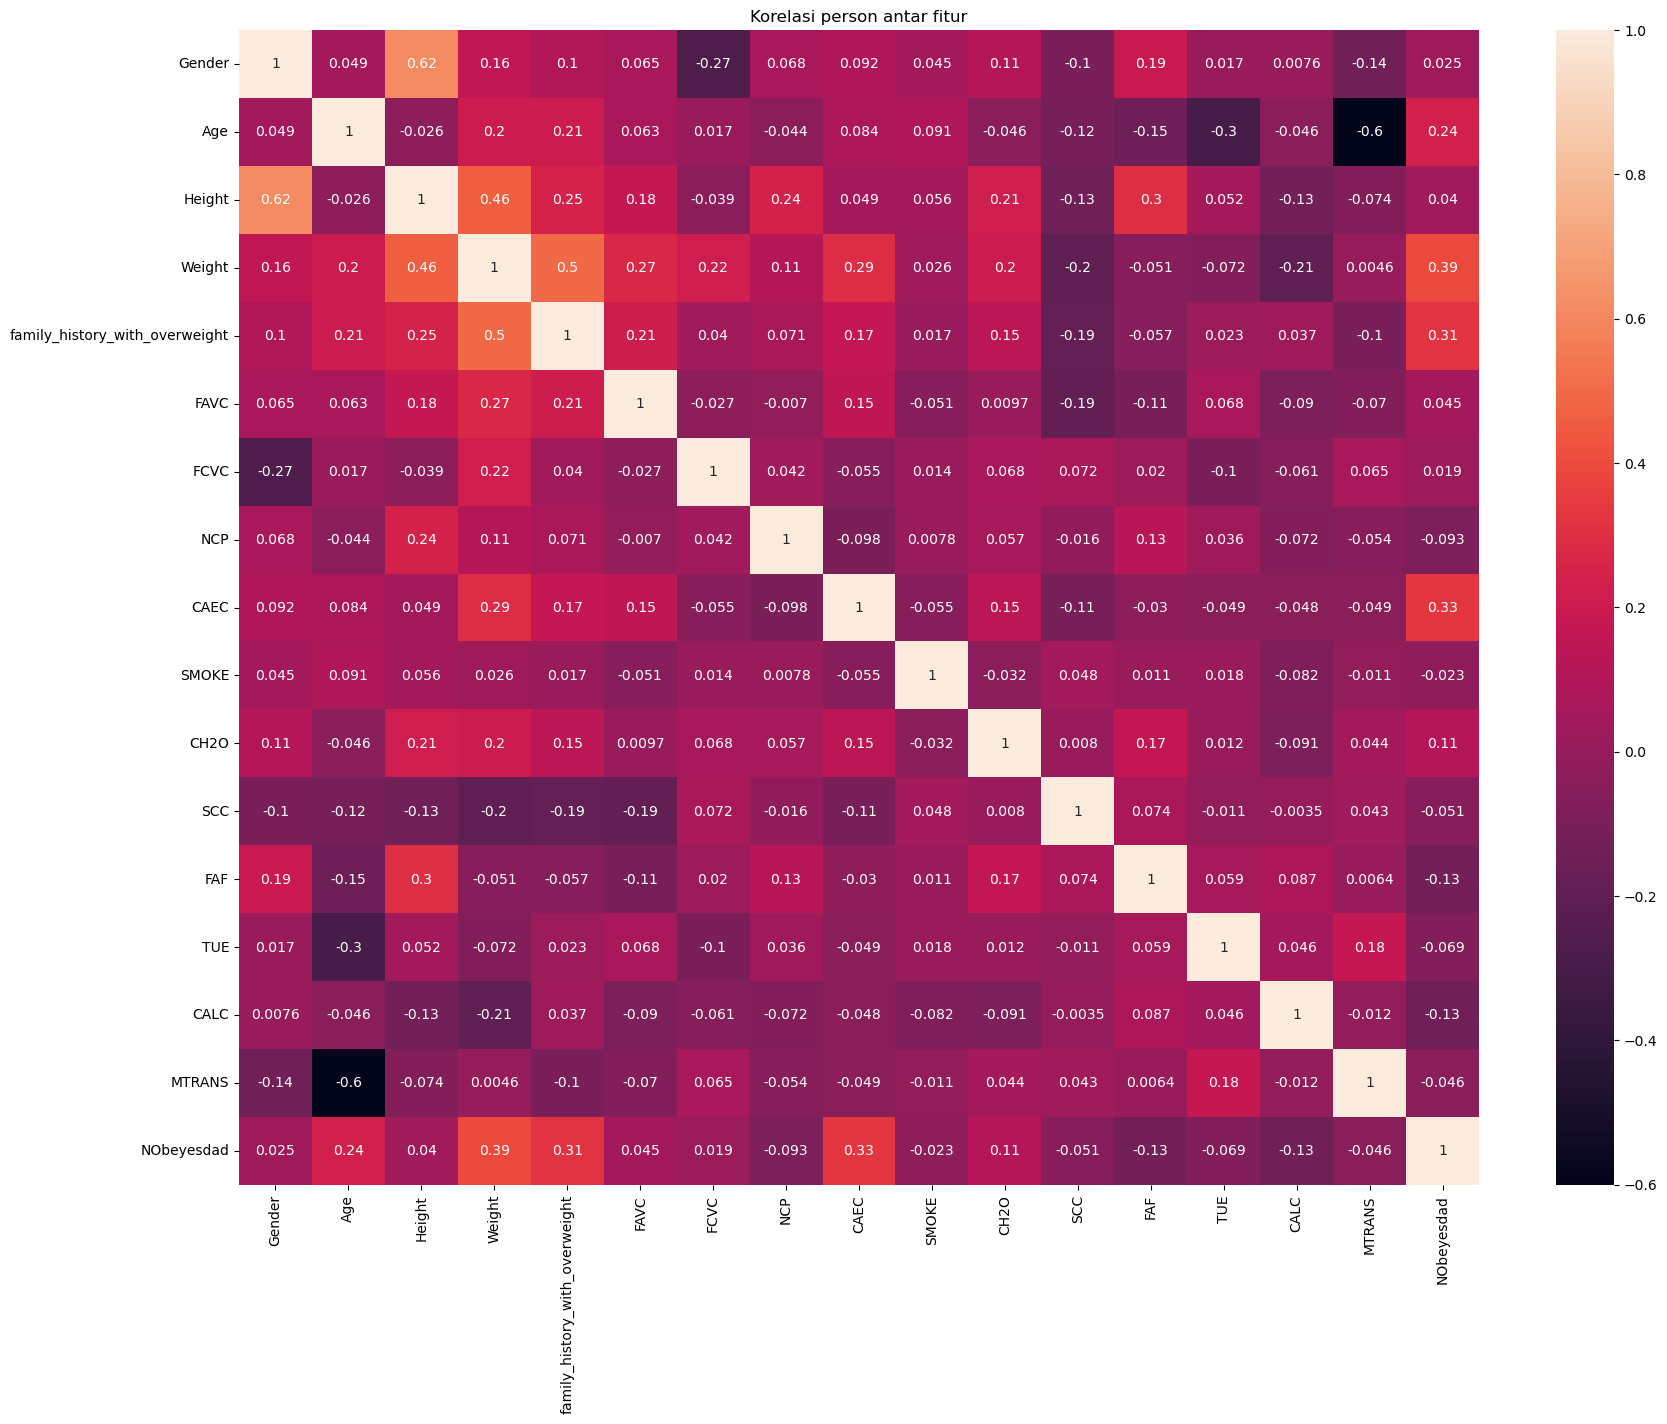

In [25]:
#korelasi pearson
plt.figure(figsize=(20,15))
sns.heatmap(df_baru.corr(),annot=True,)
plt.title("Korelasi person antar fitur")
plt.show()

Pada correlation map di atas setelah dilakukan encoding, terdapat hasil korelasi yang bagus dan agak bagus.
1. Hasil korelasi yang memiliki korelasi positif adalah hubungan antara **Gender** dan **tinggi Badan (Height)**, hubungan antara **berat badan (weight)** dan **Family history with overweight**, dan hubungan antara **umur (Age)** dengan NObeyesdad (Tingkat Obesitas).
2. Sehingga dari kolom Gender, Height, weight, Age, dan Family history with overhight memiliki korelasi yang akan diambil sebagai feature dari data yang akan diolah.

Selain dari correlation map diatas, peninjauan jurnal sebagai bahan pertimbangan juga dilakukan dengan hasil sebagai berikut.
Dari Jurnal LPPM Stikesfa ( https://www.journal.lppm-stikesfa.ac.id/index.php/FHJ/article/view/160/61 ) didapatkan fitur
1. **FAF** ( Frekuensi Aktivitas sehari-hari ) karena berhubungan langsung dengan jumlah kalori yang dibakar oleh tubuh.
2. **FAVC**(Frekuensi mengkonsumsi makanan berkalori tinggi ) karena berhubungan dengan banyaknya lemak yang diproduksi. Sehingga **FCVC ( Frekuensi mengkonsumsi sayuran ), CH20 ( Banyaknya mengkonsumsi air ), NCP ( Banyaknya waktu makan utama ), dan CAEC ( Banyaknya memakan makanan pendamping atau cemilan )** juga perpengaruh terhadap produksi lemak dan peningkatan kadar gula.

In [27]:
df_baru2 = df_baru.copy()
df_baru2 = df_baru[["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","CH2O","FAF","NObeyesdad"]]

In [28]:
df_baru2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,FAF,NObeyesdad
0,0,21,1.62,64.00,1,0,2.0,3.0,2,2.00,0.00,1
1,0,21,1.52,56.00,1,0,3.0,3.0,2,3.00,3.00,1
2,1,23,1.80,77.00,1,0,2.0,3.0,2,2.00,2.00,1
3,1,27,1.80,87.00,0,0,3.0,3.0,2,2.00,2.00,5
4,1,22,1.78,89.80,0,0,2.0,1.0,2,2.00,0.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3.0,3.0,2,1.73,1.68,4
2107,0,22,1.75,133.74,1,1,3.0,3.0,2,2.01,1.34,4
2108,0,23,1.75,133.69,1,1,3.0,3.0,2,2.05,1.41,4
2109,0,24,1.74,133.35,1,1,3.0,3.0,2,2.85,1.14,4


Setelah membuat correlation map dan peninjauan jurnal dapat dikumpulkan bahwa feature yang akan digunakan adalah **Gender, Age, Height, weight, Family history with overweight, FAVC, FCVC, NCP,CAEC, CH2O, FAF, dan NObeyesdad**

## 2. Mengecek Outlier

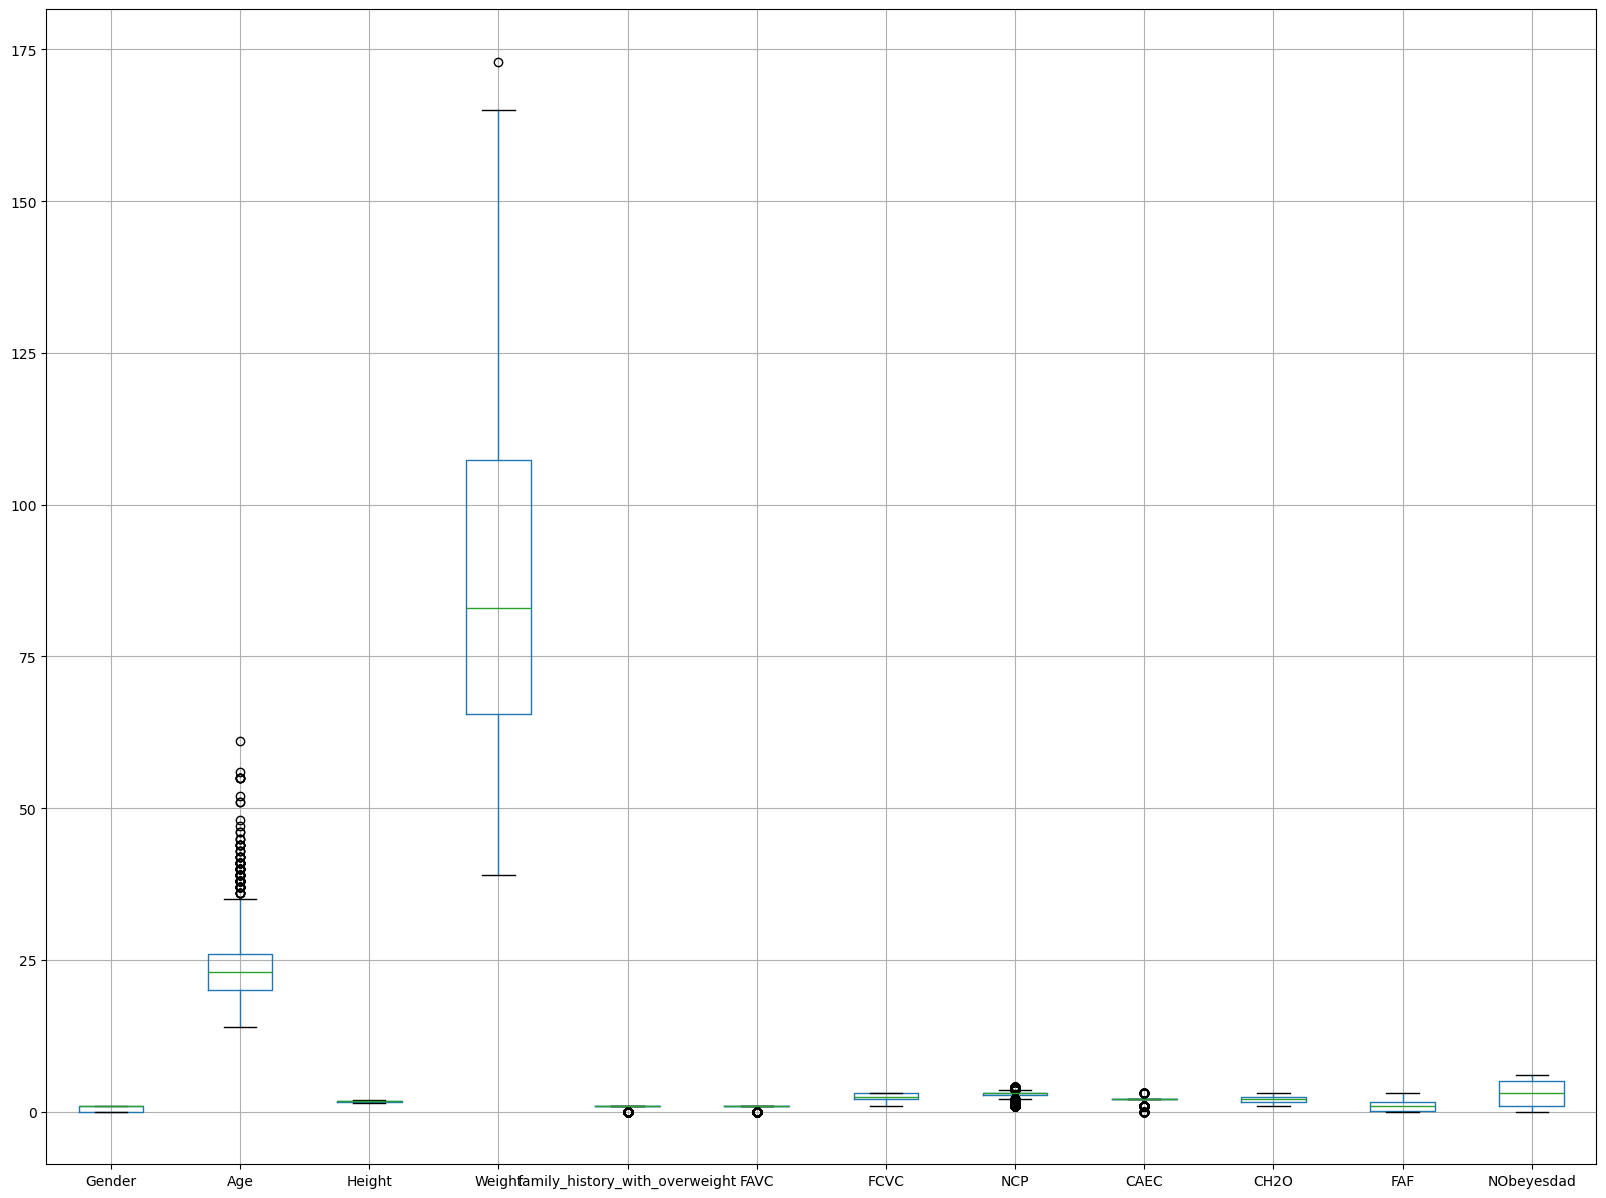

In [31]:
#membuat boxplot outlier
plt.figure(figsize=(20,15))

df_baru2.boxplot()

plt.show()


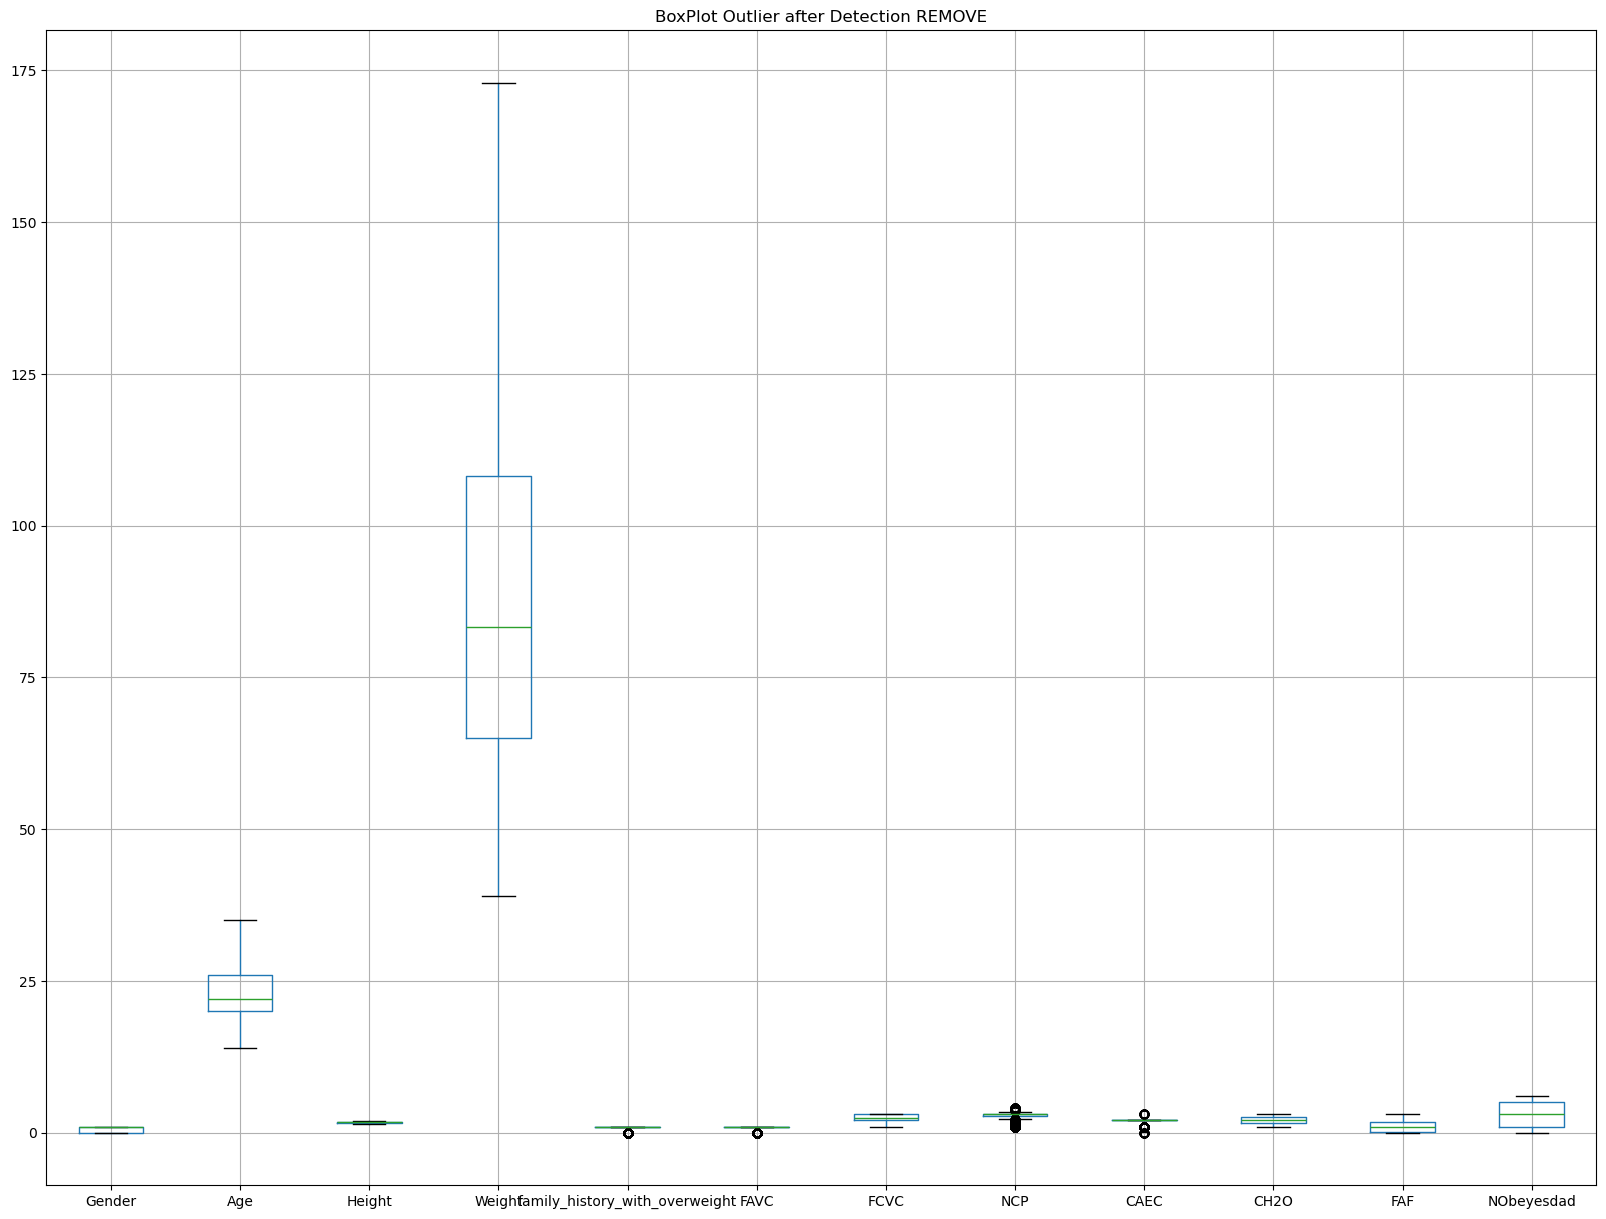

In [32]:
def remove_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outlier = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df_no_outlier

df_no_outlier= df_baru2.copy()

df_no_outlier = remove_outliers(df_no_outlier, 'Age')
df_no_outlier = remove_outliers(df_no_outlier, 'Weight')

plt.figure(figsize=(20,15))
df_no_outlier[["Gender","Age","Height","Weight","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","CH2O","FAF","NObeyesdad"]].boxplot()
plt.title("BoxPlot Outlier after Detection REMOVE")
plt.show()

In [33]:
print(df_baru2.shape)
print(df_no_outlier.shape)

(2111, 12)
(1951, 12)


# Pelatihan Machine Learning

In [35]:
x = df_no_outlier.drop(columns=["NObeyesdad"])
y = df_no_outlier["NObeyesdad"]

## 1. Xboost 

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
rasio = [0.2,0.3,0.4]

In [39]:
#model
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric="mlogloss")

Hasil peforma akurasi dari rasio 0.2
Hasil akurasi pelatihan model xgb adalah  99.48717948717949
Hasil Klasifikasin Report dari model XGBOOST rasio 0.2 pelatihan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       0.99      0.99      0.99       229
           2       1.00      1.00      1.00       225
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       263
           5       0.99      0.98      0.98       230
           6       0.98      1.00      0.99       195

    accuracy                           0.99      1560
   macro avg       0.99      1.00      0.99      1560
weighted avg       0.99      0.99      0.99      1560

Hasil akurasi pengujian model xgb adalah  97.18670076726342
Hasil Klasifikasin Report dari model XGBOOST rasio 0.2 pengujian
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
       

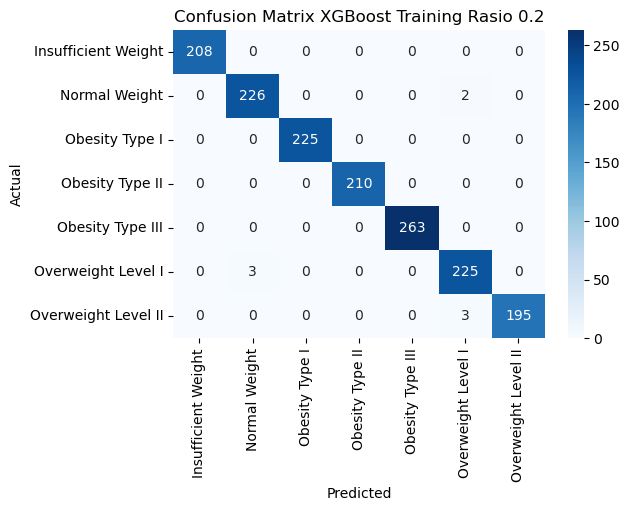

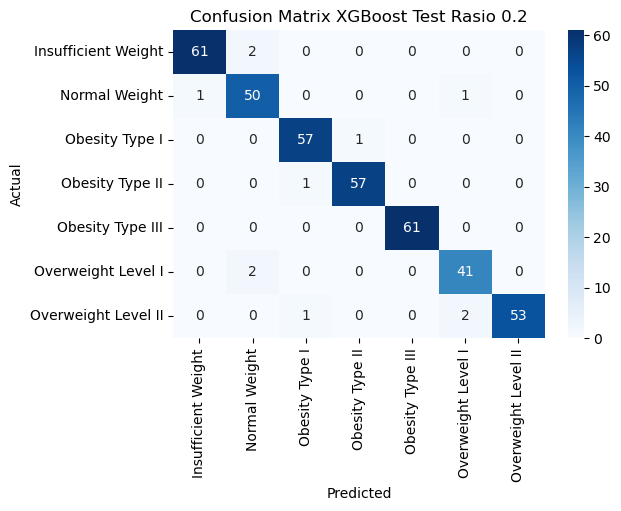

Hasil peforma akurasi dari rasio 0.3
Hasil akurasi pelatihan model xgb adalah  99.63369963369964
Hasil Klasifikasin Report dari model XGBOOST rasio 0.3 pelatihan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       0.99      0.99      0.99       199
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       184
           4       1.00      1.00      1.00       225
           5       0.99      0.98      0.99       198
           6       0.99      0.99      0.99       175

    accuracy                           1.00      1365
   macro avg       1.00      1.00      1.00      1365
weighted avg       1.00      1.00      1.00      1365

Hasil akurasi pengujian model xgb adalah  96.24573378839591
Hasil Klasifikasin Report dari model XGBOOST rasio 0.3 pengujian
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
       

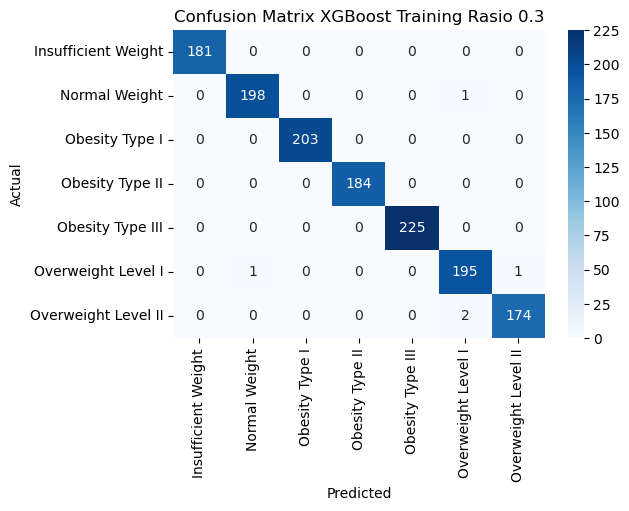

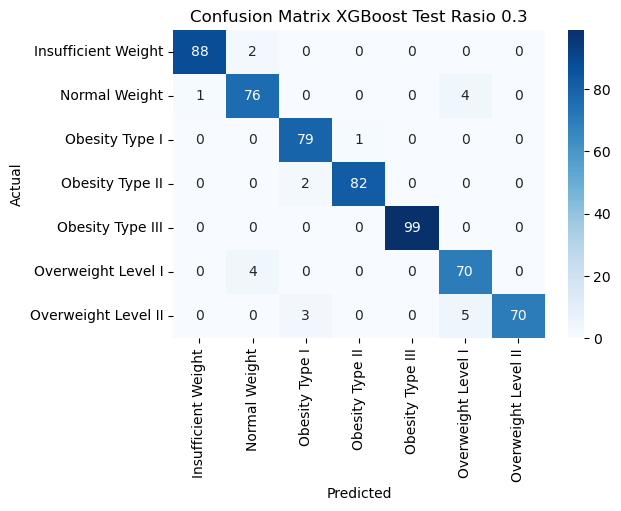

Hasil peforma akurasi dari rasio 0.4
Hasil akurasi pelatihan model xgb adalah  99.65811965811966
Hasil Klasifikasin Report dari model XGBOOST rasio 0.4 pelatihan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      0.98      0.99       169
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00       194
           5       0.98      0.99      0.99       169
           6       0.99      1.00      1.00       146

    accuracy                           1.00      1170
   macro avg       1.00      1.00      1.00      1170
weighted avg       1.00      1.00      1.00      1170

Hasil akurasi pengujian model xgb adalah  95.39052496798975
Hasil Klasifikasin Report dari model XGBOOST rasio 0.4 pengujian
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       115
       

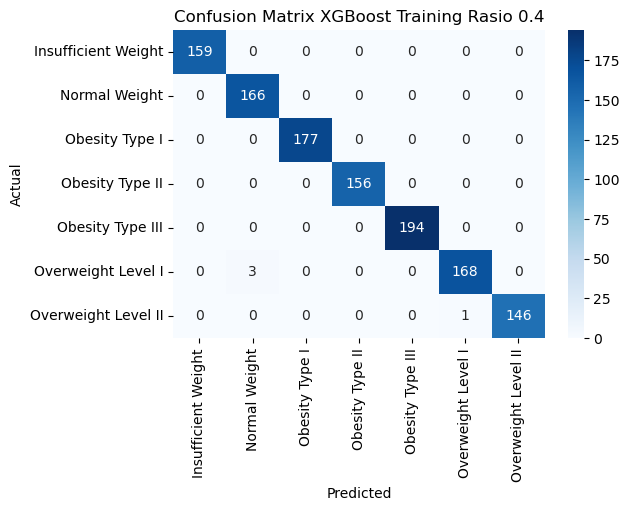

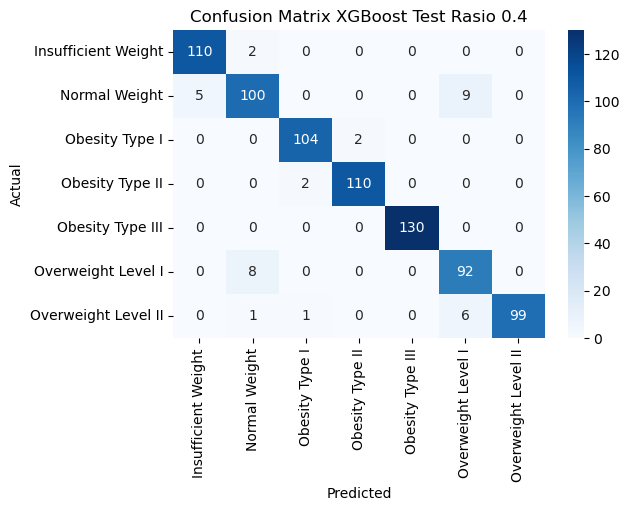

In [40]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_xgb
    
    #melatih model
    model.fit(x_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(x_test)
    
    
    print(f"Hasil peforma akurasi dari rasio {i}")
    #mengghitung akurasi SKOR training
    print("Hasil akurasi pelatihan model xgb adalah ", accuracy_score(y_pred_train,y_train)*100)
    print(f"Hasil Klasifikasin Report dari model XGBOOST rasio {i} pelatihan")
    print(classification_report(y_pred_train,y_train))
    
    #mengghitung akurasi SKOR pengujian
    print("Hasil akurasi pengujian model xgb adalah ", accuracy_score(y_pred_test,y_test)*100)
    print(f"Hasil Klasifikasin Report dari model XGBOOST rasio {i} pengujian")
    print(classification_report(y_pred_test,y_test))
    
    print("==============================================================================")

    # Plot Confusion Matrix untuk training data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', cmap='Blues',          
    xticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'], yticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II']) 
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix XGBoost Training Rasio {i}")
    plt.show()

    # Plot Confusion Matrix untuk test data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', 
    xticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'], yticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix XGBoost Test Rasio {i}")
    plt.show()
    

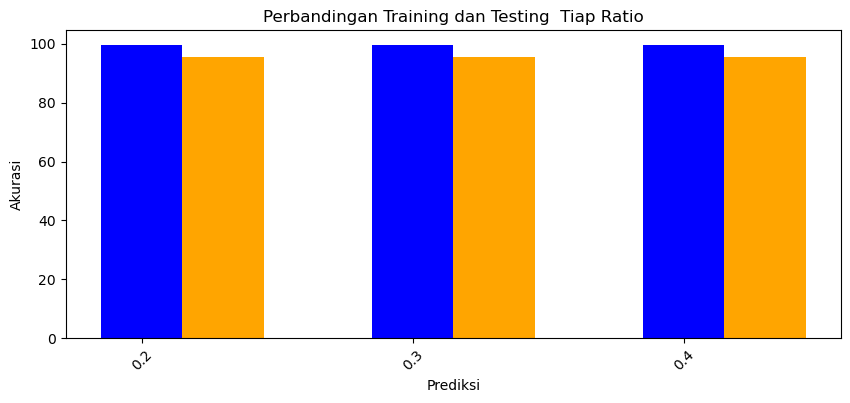

In [41]:
akurasi_testing = accuracy_score(y_pred_test,y_test)*100
akurasi_training = accuracy_score(y_train,y_pred_train)*100
bar_width = 0.3 
#Buat visualisasi data

plt.figure(figsize=(10,4))
x_indexes = range(len(rasio))
models = model_xgb
plt.bar(x_indexes, akurasi_training, width=bar_width, label='Akurasi Training', color='blue')
plt.bar([x + bar_width for x in x_indexes], akurasi_testing, width=bar_width, label='Akurasi Testing', color='orange')
plt.ylabel("Akurasi")
plt.xlabel("Prediksi")
plt.title("Perbandingan Training dan Testing  Tiap Ratio")
plt.xticks(x_indexes, labels=rasio, rotation=45)
plt.show()

##### Kesimpulan 

Dari barplot diatas, dapat disimpulkan bahwa label biru merupakan akurasi Pelatihan (training) dan label orange merupakan akurasi pengujian (testing). 
dari 3 rasio yang digunakan pada algoritma Xgboost memiliki nilai akurasi yang hampir sama namun jika diteliti lebih dalam rasio 0.2 memiliki nilai tertinggi diantara rasio lainnya dengan nilia akurasi Training (Pelatihan) sebesar 99 dan Testing sebesar 97. 

## 2. Naive Bayes

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [45]:
rasio = [0.2,0.3,0.4]

In [46]:
#model 
model_nb= GaussianNB()

Hasil peforma akurasi dari rasio 0.2
Hasil akurasi pelatihan model naive bayes adalah  66.02564102564102
Hasil Klasifikasin Report dari model Naive Bayes rasio 0.2 pelatihan
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       260
           1       0.47      0.64      0.54       169
           2       0.58      0.42      0.49       310
           3       0.96      0.66      0.78       305
           4       0.99      0.95      0.97       274
           5       0.34      0.59      0.43       133
           6       0.29      0.52      0.37       109

    accuracy                           0.66      1560
   macro avg       0.65      0.65      0.63      1560
weighted avg       0.73      0.66      0.68      1560

Hasil akurasi pengujian model naive bayes adalah  65.21739130434783
Hasil Klasifikasin Report dari model Naive Bayes rasio 0.2 pengujian
              precision    recall  f1-score   support

           0       0.97      0.75    

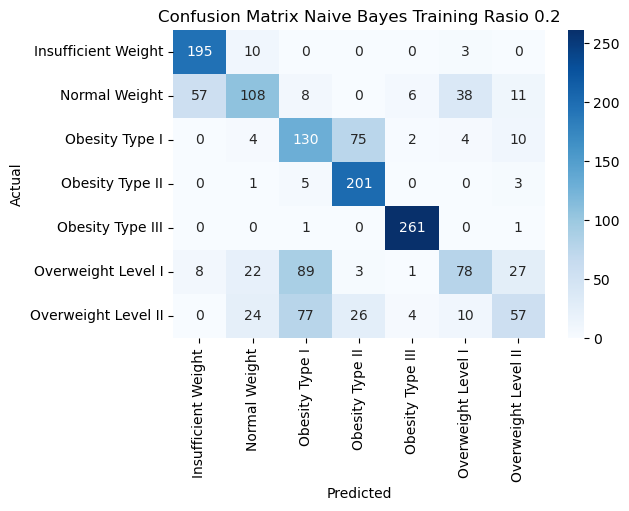

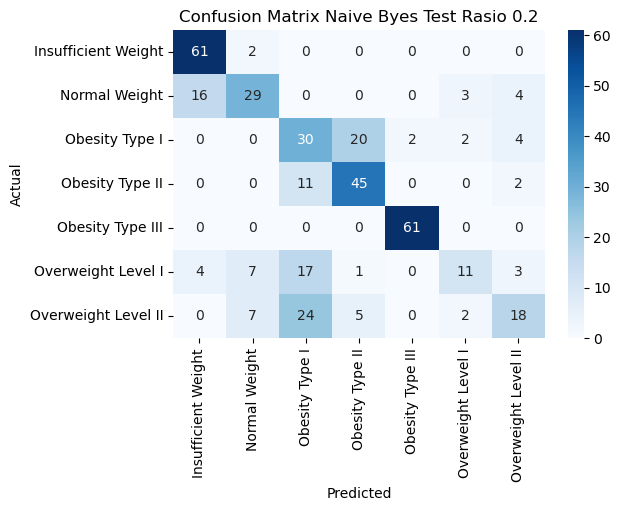

Hasil peforma akurasi dari rasio 0.3
Hasil akurasi pelatihan model naive bayes adalah  66.52014652014651
Hasil Klasifikasin Report dari model Naive Bayes rasio 0.3 pelatihan
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       226
           1       0.48      0.64      0.55       151
           2       0.61      0.43      0.50       289
           3       0.95      0.68      0.79       255
           4       1.00      0.95      0.97       237
           5       0.35      0.62      0.45       111
           6       0.30      0.54      0.38        96

    accuracy                           0.67      1365
   macro avg       0.66      0.66      0.64      1365
weighted avg       0.74      0.67      0.68      1365

Hasil akurasi pengujian model naive bayes adalah  65.69965870307168
Hasil Klasifikasin Report dari model Naive Bayes rasio 0.3 pengujian
              precision    recall  f1-score   support

           0       0.94      0.74    

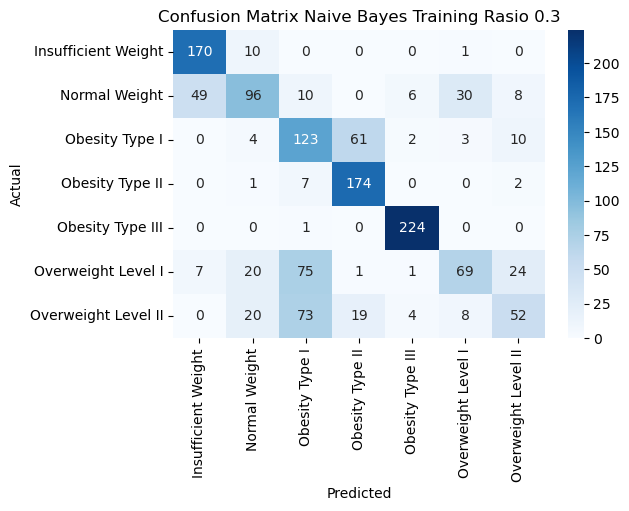

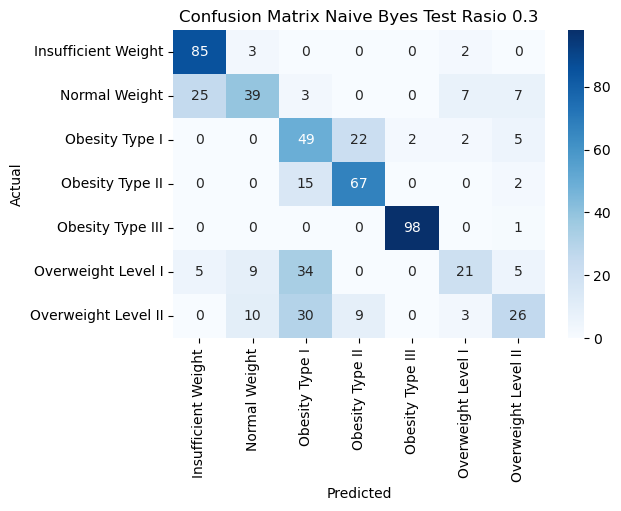

Hasil peforma akurasi dari rasio 0.4
Hasil akurasi pelatihan model naive bayes adalah  66.75213675213675
Hasil Klasifikasin Report dari model Naive Bayes rasio 0.4 pelatihan
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       194
           1       0.49      0.64      0.56       128
           2       0.59      0.44      0.50       239
           3       0.94      0.68      0.79       214
           4       0.99      0.95      0.97       203
           5       0.35      0.62      0.44        95
           6       0.33      0.49      0.39        97

    accuracy                           0.67      1170
   macro avg       0.66      0.66      0.64      1170
weighted avg       0.73      0.67      0.68      1170

Hasil akurasi pengujian model naive bayes adalah  65.81306017925736
Hasil Klasifikasin Report dari model Naive Bayes rasio 0.4 pengujian
              precision    recall  f1-score   support

           0       0.95      0.73    

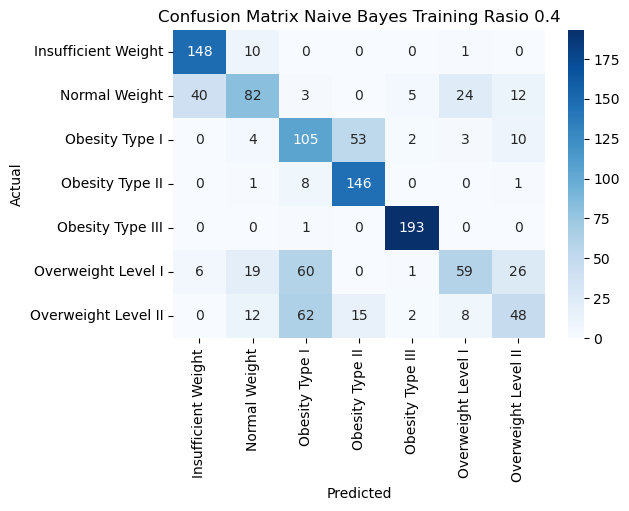

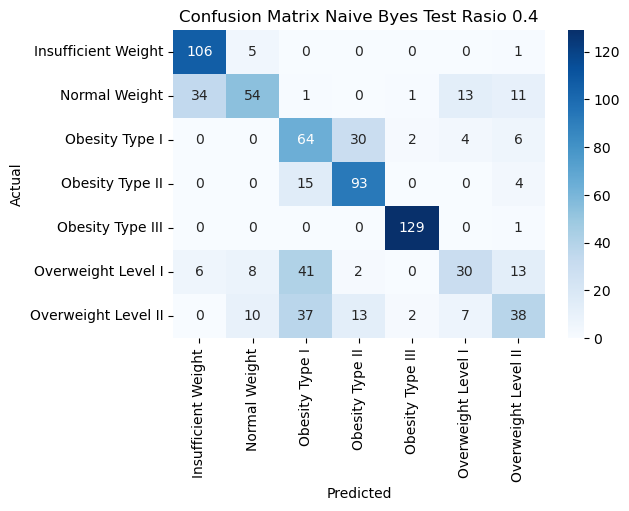

In [47]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_nb
    
    #melatih model
    model.fit(x_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(x_test)
    
    
    print(f"Hasil peforma akurasi dari rasio {i}")
    #mengghitung akurasi SKOR training
    print("Hasil akurasi pelatihan model naive bayes adalah ", accuracy_score(y_pred_train,y_train)*100)
    print(f"Hasil Klasifikasin Report dari model Naive Bayes rasio {i} pelatihan")
    print(classification_report(y_pred_train,y_train))
    
    #mengghitung akurasi SKOR pengujian
    print("Hasil akurasi pengujian model naive bayes adalah ", accuracy_score(y_pred_test,y_test)*100)
    print(f"Hasil Klasifikasin Report dari model Naive Bayes rasio {i} pengujian")
    print(classification_report(y_pred_test,y_test))
    
    print("==============================================================================")

    
    # Plot Confusion Matrix untuk training data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', cmap='Blues',          
    xticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'], yticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II']) 
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix Naive Bayes Training Rasio {i}")
    plt.show()

    # Plot Confusion Matrix untuk test data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues',
    xticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'], yticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix Naive Byes Test Rasio {i}")
    plt.show()

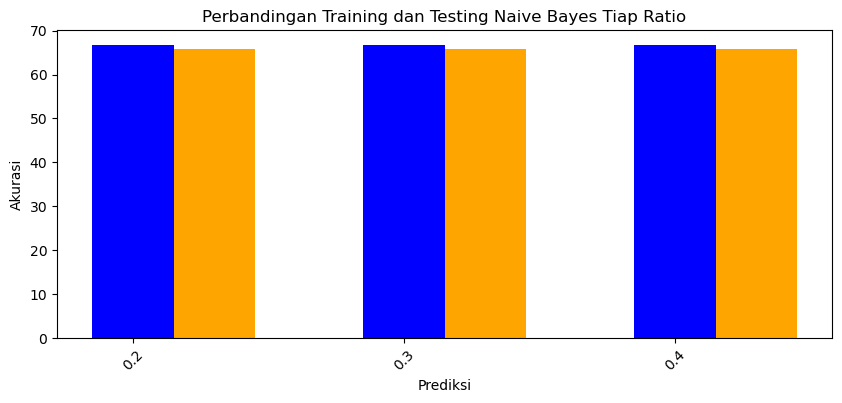

In [48]:
akurasi_testing_nb = accuracy_score(y_pred_test,y_test)*100
akurasi_training_nb = accuracy_score(y_train,y_pred_train)*100
bar_width = 0.3 
#Buat visualisasi data

plt.figure(figsize=(10,4))
x_indexes = range(len(rasio))
models = model_nb
plt.bar(x_indexes, akurasi_training_nb, width=bar_width, label='Akurasi Training', color='blue')
plt.bar([x + bar_width for x in x_indexes], akurasi_testing_nb, width=bar_width, label='Akurasi Testing', color='orange')
plt.ylabel("Akurasi")
plt.xlabel("Prediksi")
plt.title("Perbandingan Training dan Testing Naive Bayes Tiap Ratio")
plt.xticks(x_indexes, labels=rasio, rotation=45)
plt.show()


##### Kesimpulan 

Dari barplot diatas, dapat disimpulkan bahwa label biru merupakan akurasi Pelatihan (training) dan label orange merupakan akurasi pengujian (testing). 
dari 3 rasio yang digunakan pada algoritma Naive Bayes memiliki nilai akurasi yang hampir sama namun jika diteliti lebih dalam rasio 0.4 memiliki nilai tertinggi diantara rasio lainnya dengan nilia akurasi Training (Pelatihan) sebesar 66,1 dan Testing sebesar 66. 

## 3. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rasio = [0.2,0.3,0.4]

In [53]:
#model
model_rfc = RandomForestClassifier(n_estimators=100,random_state=42)

Hasil peforma akurasi dari rasio 0.2
Hasil akurasi pelatihan model rfc adalah  100.0
Hasil Klasifikasin Report dari model RFC rasio 0.2 pelatihan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       225
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       263
           5       1.00      1.00      1.00       228
           6       1.00      1.00      1.00       198

    accuracy                           1.00      1560
   macro avg       1.00      1.00      1.00      1560
weighted avg       1.00      1.00      1.00      1560

Hasil akurasi pengujian model rfc adalah  96.16368286445012
Hasil Klasifikasin Report dari model RFC rasio 0.2 pengujian
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.98    

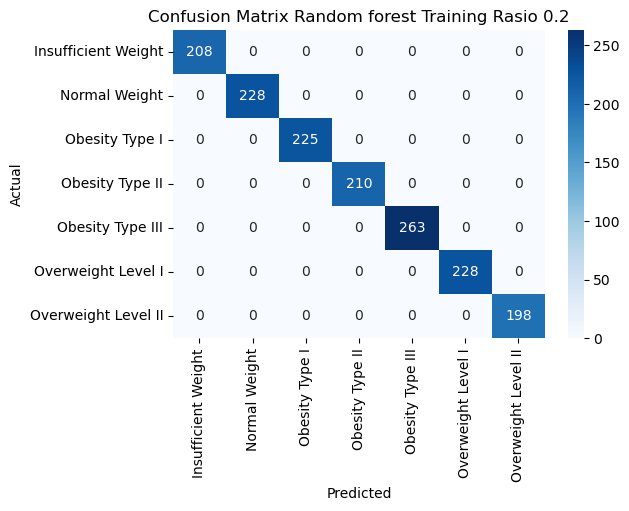

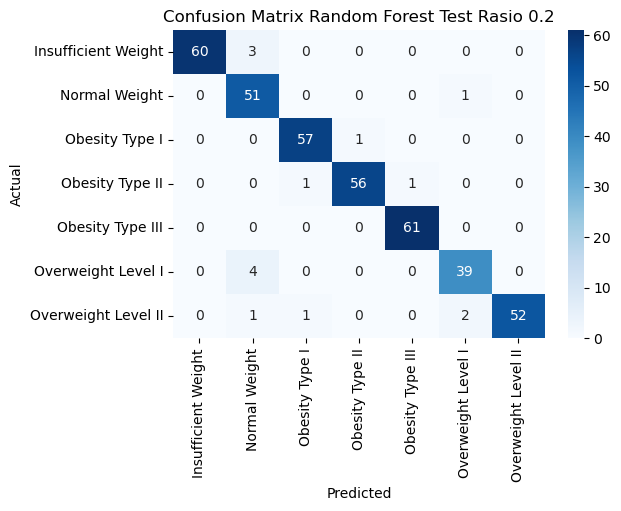

Hasil peforma akurasi dari rasio 0.3
Hasil akurasi pelatihan model rfc adalah  100.0
Hasil Klasifikasin Report dari model RFC rasio 0.3 pelatihan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       199
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       184
           4       1.00      1.00      1.00       225
           5       1.00      1.00      1.00       197
           6       1.00      1.00      1.00       176

    accuracy                           1.00      1365
   macro avg       1.00      1.00      1.00      1365
weighted avg       1.00      1.00      1.00      1365

Hasil akurasi pengujian model rfc adalah  95.39249146757679
Hasil Klasifikasin Report dari model RFC rasio 0.3 pengujian
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        87
           1       0.98    

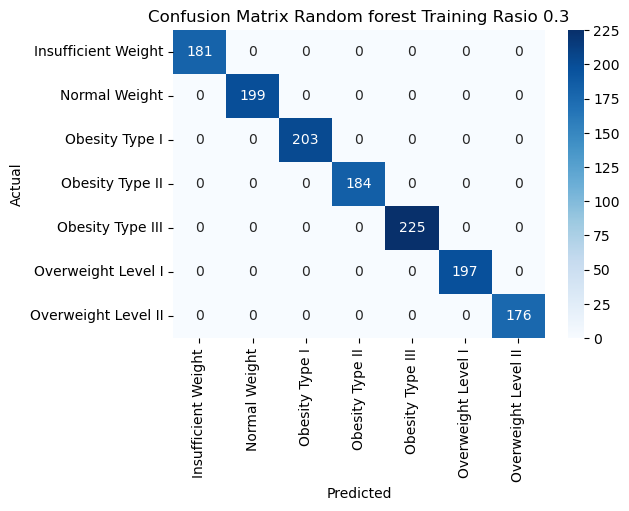

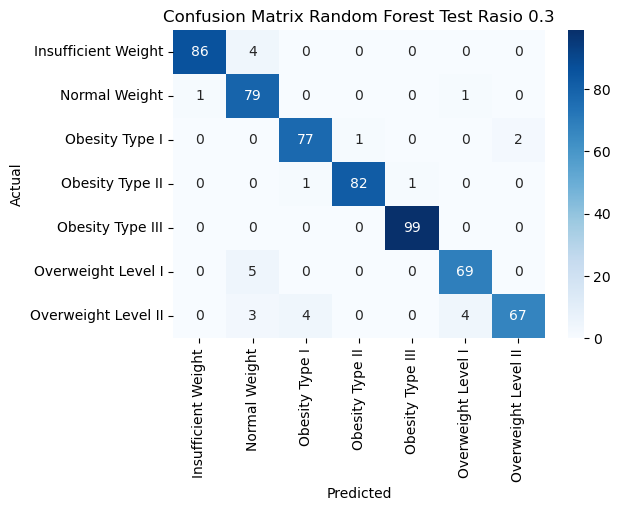

Hasil peforma akurasi dari rasio 0.4
Hasil akurasi pelatihan model rfc adalah  100.0
Hasil Klasifikasin Report dari model RFC rasio 0.4 pelatihan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00       194
           5       1.00      1.00      1.00       171
           6       1.00      1.00      1.00       147

    accuracy                           1.00      1170
   macro avg       1.00      1.00      1.00      1170
weighted avg       1.00      1.00      1.00      1170

Hasil akurasi pengujian model rfc adalah  95.13444302176697
Hasil Klasifikasin Report dari model RFC rasio 0.4 pengujian
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       111
           1       0.95    

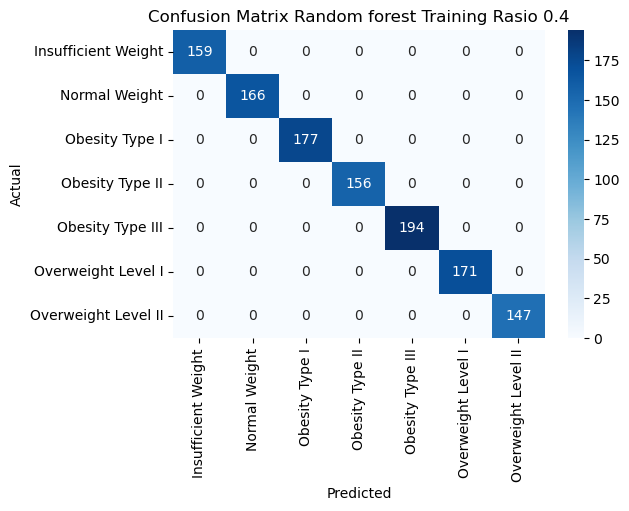

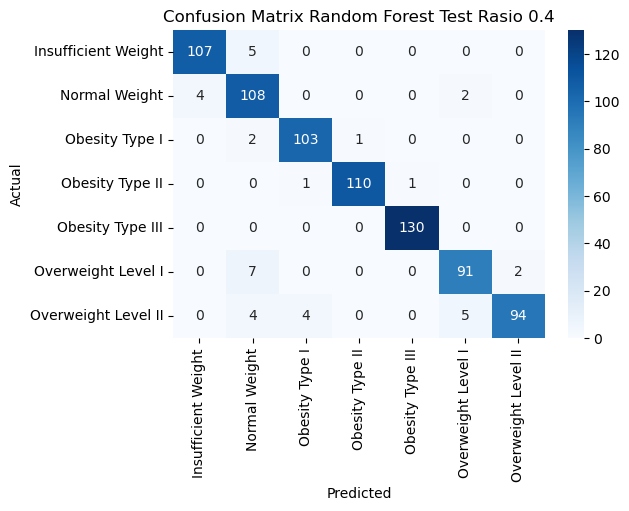

In [54]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_rfc
    
    #melatih model
    model.fit(x_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(x_test)
    
    
    print(f"Hasil peforma akurasi dari rasio {i}")
    #mengghitung akurasi SKOR training
    print("Hasil akurasi pelatihan model rfc adalah ", accuracy_score(y_pred_train,y_train)*100)
    print(f"Hasil Klasifikasin Report dari model RFC rasio {i} pelatihan")
    print(classification_report(y_pred_train,y_train))
    
    #mengghitung akurasi SKOR pengujian
    print("Hasil akurasi pengujian model rfc adalah ", accuracy_score(y_pred_test,y_test)*100)
    print(f"Hasil Klasifikasin Report dari model RFC rasio {i} pengujian")
    print(classification_report(y_pred_test,y_test))
    
    print("==============================================================================")


    
    # Plot Confusion Matrix untuk training data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', cmap='Blues',             
    xticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'], yticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix Random forest Training Rasio {i}")
    plt.show()

    # Plot Confusion Matrix untuk test data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', 
    xticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'], yticklabels=['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix Random Forest Test Rasio {i}")
    plt.show()

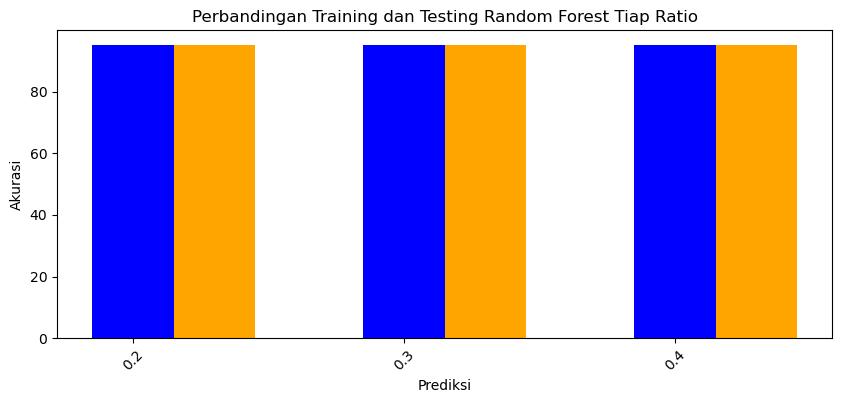

In [55]:
akurasi_testing_rfc = accuracy_score(y_pred_test,y_test)*100
akurasi_training_rfc = accuracy_score(y_train,y_pred_train)*100
bar_width = 0.3 
#Buat visualisasi data

plt.figure(figsize=(10,4))
x_indexes = range(len(rasio))
models = model_rfc
plt.bar(x_indexes, akurasi_testing_rfc, width=bar_width, label='Akurasi Training', color='blue')
plt.bar([x + bar_width for x in x_indexes], akurasi_testing_rfc, width=bar_width, label='Akurasi Testing', color='orange')
plt.ylabel("Akurasi")
plt.xlabel("Prediksi")
plt.title("Perbandingan Training dan Testing Random Forest Tiap Ratio")
plt.xticks(x_indexes, labels=rasio, rotation=45)
plt.show()

##### Kesimpulan 

Dari barplot diatas, dapat disimpulkan bahwa label biru merupakan akurasi Pelatihan (training) dan label orange merupakan akurasi pengujian (testing). 
dari 3 rasio yang digunakan pada algoritma Random Forest Classifier memiliki nilai akurasi yang hampir sama namun jika diteliti lebih dalam rasio 0.2 memiliki nilai tertinggi diantara rasio lainnya dengan nili akurasi Training (Pelatihan) sebesar 100 dan Testing sebesar 96. 

# Simpan Model

In [58]:
import joblib

joblib.dump(model_xgb, "model_obesitas_xgb.joblib")

['model_obesitas_xgb.joblib']

In [59]:
import pickle
with open('model_xgb.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)

print("Model berhasil disimpan di model_xgb.pkl!")

Model berhasil disimpan di model_xgb.pkl!


# Memuat Model

In [61]:
muat_model = joblib.load("model_obesitas_xgb.joblib")

In [62]:
#memuat model yang telah disimpan
# Memuat model yang telah disimpan
with open('model_xgb.pkl', 'rb') as f:
    model = pickle.load(f)

# Memprediksi Data Baru

In [64]:
df_baru2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   CH2O                            2111 non-null   float64
 10  FAF                             2111 non-null   float64
 11  NObeyesdad                      2111 non-null   int32  
dtypes: float64(6), int32(5), int64(1)


In [110]:
def Prediksi_Obesitas(model):
    print("=== Silahkan Masukan data pasien ===")
    Gender = int(input("Masukan Gender  (1: Male, 2: Female) : "))
    Age = int(input("Masukan Umur : "))
    Height = int(input("Masukan Tinggi Badan Pasien : "))
    Weight = int(input("Masukan Berat Badan Pasien : "))
    Family_history_with_overweight = int(input("Apakah memiliki Keluarga yang Mengalami Obesitas: (1: Ya, 0: Tidak)"))
    FAVC = int(input("Seberapa sering mengkonsumsi makanan berkalori tinggi: (1: Jarang, 2: Kadang, 3: Sering) "))
    FCVC = float(input("Seberapa sering mengkonsumsi makanan sayuran: "))
    NCP = float(input("Seberapa banyak makan perhari: (1: Kurang, 2: Normal, 3: Sering, 4: Sangat Sering)"))
    CAEC = int(input("Seberapa sering anda mengkonsumsi makanan lainnya selain makanan pokok: (1: Tidak pernah, 2: Selalu, 3: Sering, 4: Kadang) "))
    CH2O = float(input("Seberapa sering konsumsi air mineral (1: Kurang, 2: Normal, 3: Sering, 4: Sangat Sering) : "))
    FAF = float(input("Seberapa sering anda beraktivitas (0: Tidak Pernah, 1: Jarang, 2: Kadang, 3: Sering): "))
    
    data_baru = np.array([Gender,
                          Age,
                          Height,
                          Weight,
                          Family_history_with_overweight,
                          FAVC,
                          FCVC,
                          NCP,
                          CAEC,
                          CH2O,
                          FAF ])

    
    data_baru = data_baru.reshape(1,-1)
    prediksi = model.predict(data_baru)
    pred_Obesitas = prediksi[0]  # Mengambil hasil prediksi pertama
    
    prediksi = model.predict(data_baru) 
    print("\nHasil Prediksi:")
    print(f"Kategori Obesitas: {prediksi[0]}")

In [112]:
Prediksi_Obesitas(model_xgb)

=== Silahkan Masukan data pasien ===


Masukan Gender  (1: Male, 2: Female) :  111
Masukan Umur :  1
Masukan Tinggi Badan Pasien :  11
Masukan Berat Badan Pasien :  1
Apakah memiliki Keluarga yang Mengalami Obesitas: (1: Ya, 0: Tidak) 1
Seberapa sering mengkonsumsi makanan berkalori tinggi: (1: Jarang, 2: Kadang, 3: Sering)  1
Seberapa sering mengkonsumsi makanan sayuran:  1
Seberapa banyak makan perhari: (1: Kurang, 2: Normal, 3: Sering, 4: Sangat Sering) 11
Seberapa sering anda mengkonsumsi makanan lainnya selain makanan pokok: (1: Tidak pernah, 2: Selalu, 3: Sering, 4: Kadang)  1
Seberapa sering konsumsi air mineral (1: Kurang, 2: Normal, 3: Sering, 4: Sangat Sering) :  1
Seberapa sering anda beraktivitas (0: Tidak Pernah, 1: Jarang, 2: Kadang, 3: Sering):  1



Hasil Prediksi:
Kategori Obesitas: 0


# Kesimpulan

Dari projek yang telah dibuat dapat disimpulkan bahwa : 
Data yang digunakan berisi 2111 baris 17 kolom, setelah melakukan data loading dan dilanjutkan dengan explorasi data dan pelatihan machine leraning. 

Dari 17 kolom yang ada, kolom "NObeyesdad" merupakan target yang ingin diprediksi dan terdapat 7 value yang menunjukan tingkatan obesitas yang dialami oleh seseorang. 

Variabel yng dipilih untuk digunakan sebagai feature dalam pembuatan model adalah 'Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','CH2O'dan 'FAF. 

Dalam pengembangan model dibuat dengan tiga algoritma klasifikasi yaitu Xboost, Naive Bayes, dan Random Forest Classifier. Dari hasil performa tiap algoritma memiliki performa yang tidak semunya baik. Dari percobaan algoritma Xboost memberikan performa terbaik pada rasio 0.2 dengan hasil akurasi pelatihan adalah 99 dan hasil akurasi pengujian adalah 97. Selanjutnya percobaan algoritma Random Forest Classifier memberikan performa terbaiknya oada rasio 0.2 dengan hasil akurasi pelatihan 100 dan hasil akurasi test sebesar 96. Lalu berbeda hasil dengn yang lainnya, algoritma Naive Bayes memberikan performa yang cukup baik dengan hasil yang tidak beda jauh per rasio yang diuji dengan hasil akurasi pelatihan 66 dan hasil akurasi pengujian 65. Namun meskipun nilai akurasi pelatihan (Training) yang dimiliki oleh Random Forest mencapai nilai akurasi 100 namun dalam projek kali ini yang digunakan adalah algoritma Xgboost dengan alasan : 
1. XGBoost memiliki selisih lebih kecil, gap hanya 2 antara akurasi data pelatihan dan data pengujuan yang berarti model lebih stabil dan generalizable terhadap data baru serta tingkat overfitting yang lebih rendah.
2. XGBoost memiliki nilai pengujian lebih tinggi (97) dibanding Random Forest (96), yang menunjukkan performa lebih baik pada data baru.
